In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [38]:
events = pd.read_csv('data/events.csv', low_memory = False)


Text(0.5,1,'Checkouts de cada maraca')

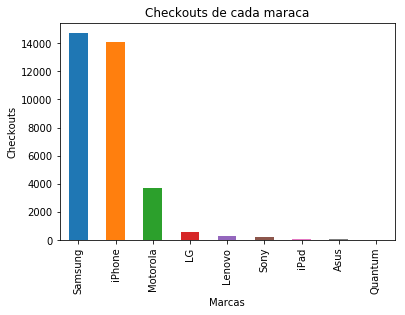

In [34]:
#Marcas que participan de todos los events

events1 = events.loc[:,['timestamp','event','person','sku','model','condition','storage']]
events1 = events1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
events1 = events1[events1["event"] == 'checkout']
events1['marca'] = events1['model'].apply(lambda x: x.split(' ')[0])
events1['marca'].value_counts().plot(kind='bar')
plt.ylabel('Checkouts')
plt.xlabel('Marcas')
plt.title('Checkouts de cada maraca')

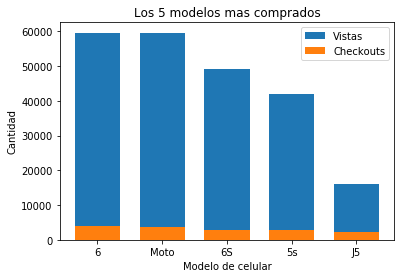

In [33]:
# modelos vistos y sus checkouts
events1 = events[pd.notnull(events['model'])]
events2 = events[pd.notnull(events['event'])]

events1 = events.loc[:,['event','model']]
events2 = events.loc[:,['event','model']]

events1 = events1[events1['event'] == 'checkout']
events2 = events2[events2['event'] == 'viewed product']
events1['model'] = events1['model'].apply(lambda x: x.split(' ')[1] if "Galaxy" not in x.split(' ')[1] else x.split(' ')[2])
events2['model'] = events2['model'].apply(lambda x: x.split(' ')[1] if "Galaxy" not in x.split(' ')[1] else x.split(' ')[2])

events1['cantidad_checks'] = 1
events2['cantidad_vp'] = 1
events3 = pd.DataFrame({'cantidad_checks': events1.groupby('model')['cantidad_checks'].sum()}).reset_index()
events4 = pd.DataFrame({'cantidad_vp': events2.groupby('model')['cantidad_vp'].sum()}).reset_index()
events5 = events3.merge(events4, on = 'model', how = 'left')
events5 = events5.sort_values(by='cantidad_checks',ascending=False)
events5 = events5[pd.notnull(events5['model'])]
events5 = events5.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
events5 = events5.iloc[:5,:]
x1 = events5.model.values
x2 = x1
y1 = events5.cantidad_checks.values
y2 = events5.cantidad_vp.values
p1 = plt.bar(x2, y2, 0.70)
p2 = plt.bar(x1, y1, 0.70)

plt.ylabel('Cantidad')
plt.xlabel('Modelo de celular')
plt.legend((p1[0], p2[0]), ('Vistas', 'Checkouts'))
plt.title('Los 5 modelos mas comprados')
plt.xticks(x1)


plt.show()


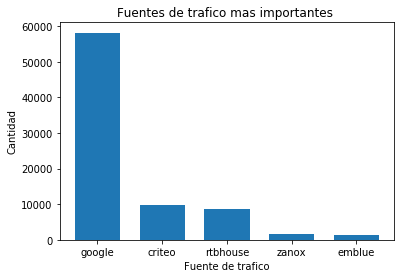

In [48]:
# Fuentes de tarfico mas importantes 

events3 = events[pd.notnull(events['campaign_source'])].loc[:,['campaign_source']]
events3['cant'] = 1
events3 = pd.DataFrame({'cantidad': events3.groupby('campaign_source')['cant'].sum()}).reset_index()
events3 = events3.sort_values(by='cantidad',ascending=False)
events3 = events3.iloc[:5,:]
x1 = events3.campaign_source.values
y1 = events3.cantidad.values
plt.ylabel('Cantidad')
plt.xlabel('Fuente de trafico')
plt.title('Fuentes de trafico mas importantes ')
p1 = plt.bar(x1, y1, 0.70)
#plt.xticks(x1)

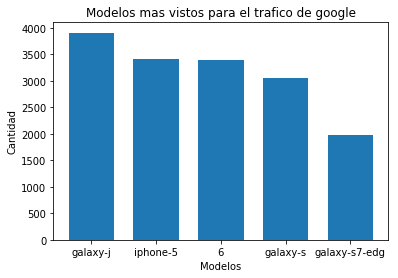

In [62]:

events6 = events.loc[:,['campaign_source','event','url','person']]
events6 = events6[pd.notnull(events6['campaign_source'])]
events6 = events6[pd.notnull(events6['url'])]

events6['lista_operacion'] = events6['url'].apply(lambda x: x[1:-1].split("/"))
events6['largo_operacion'] = events6['lista_operacion'].apply(lambda x: len(x))
events6['operacion'] = events6['lista_operacion'].apply(lambda x: x[0])

events6 = events6[events6['operacion'] == 'comprar']
events6 = events6[events6['largo_operacion'] == 3]

events6['Modelo'] = events6['lista_operacion'].apply(lambda x: x[2])
events6['cant'] = 1
events6 = pd.DataFrame({'cantidad': events6.groupby('Modelo')['cant'].sum()}).reset_index()
events6 = events6.sort_values(by='cantidad',ascending=False)
events6 = events6.iloc[1:6,:]
x1 = events6.Modelo.values
y1 = events6.cantidad.values
plt.ylabel('Cantidad')
plt.xlabel('Modelos')
plt.title('Modelos mas vistos para el trafico de google')
p1 = plt.bar(x1, y1, 0.70)
plt.show()

